In [2]:
import Simulation as G
import RotRep as R
import numpy as np
import matplotlib.pyplot as plt
from IntBin import ReadI9BinaryFiles

In [3]:
exp={'energy':71.676}
etalimit=81/180.0*np.pi
grainpos=np.array([0, 0.0974279, 0])
orien=R.EulerZXZ2Mat(np.array([89.5003, 80.7666, 266.397])/180.0*np.pi)

reload(G)
sample=G.CrystalStr('Ti7')
#sample.setPrim([3.61,0,0],[0,3.61,0],[0,0,3.61])
#sample.addAtom([0,0,0],29)
sample.getRecipVec()
sample.getGs(10)


Det1=G.Detector()
Det1.Move(935.166,1998.96,np.array([4.72573,0,0]),R.EulerZXZ2Mat(np.array([90.6659, 89.4069,359.073])/180.0*np.pi))
Det1.Print()

Norm:  [ 0.99987889  0.01162126  0.01035136]
CoordOrigin:  [ 4.71040706 -1.33626942  2.98030569]
J vector:  [-0.01145291  0.99980354 -0.01617763]
K vector:  [ 0.01053733 -0.01605712 -0.99981555]


In [5]:
Peaks=[]
#CorGs=[]
rotatedG=orien.dot(sample.Gs.T).T
for g1 in rotatedG:
    res=G.frankie_angles_from_g(g1,verbo=False,**exp)
    if res['chi']>=90:
        pass
    elif res['eta']>etalimit:
        pass
    else:
        if -90<=res['omega_a']<=90:
            omega=res['omega_a']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            try:
                idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],res['eta'])
            except:
                print g
                print res
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_a']])
#                CorGs.append(g)
        if -90<=res['omega_b']<=90:
            omega=res['omega_b']/180.0*np.pi
            newgrainx=np.cos(omega)*grainpos[0]-np.sin(omega)*grainpos[1]
            newgrainy=np.cos(omega)*grainpos[1]+np.sin(omega)*grainpos[0]
            idx=Det1.IntersectionIdx(np.array([newgrainx,newgrainy,0]),res['2Theta'],-res['eta'])
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_b']])
#                CorGs.append(g)
Peaks=np.array(Peaks)
#CorGs=np.array(CorGs)

In [8]:
Peaks[1]

array([  442.        ,  1267.        ,    57.32797186])

In [36]:
ii=44
print int((Peaks[ii,2]+90)) 
#print 2047-Peaks[ii][0]
#plt.scatter(2047-Peaks[ii][0],2047-Peaks[ii][1],c='r',s=10)
#plt.axis('scaled')
#plt.xlim((0,2048))
#plt.ylim((0,2048))
#plt.show()

21


<IPython.core.display.Javascript object>


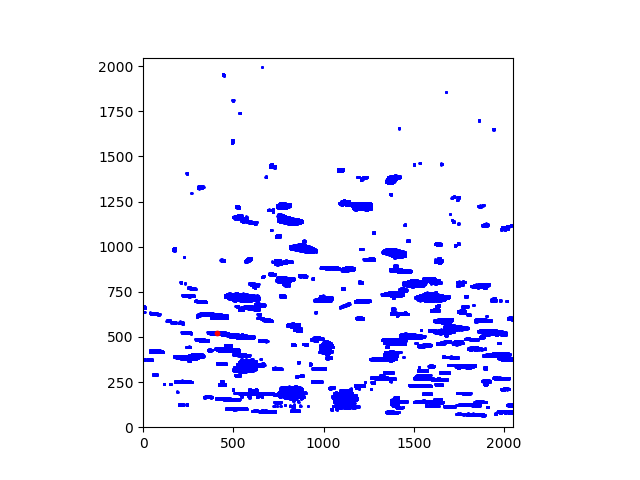

In [37]:
b=ReadI9BinaryFiles('/work/yufengs/Mar17/S0/IntegratedReduced/S0_z0_000021.bin0')
plt.scatter(2047-b[0],2047-b[1],c='b',s=1)


plt.scatter(2047-Peaks[ii][0],2047-Peaks[ii][1],c='r',s=10)

plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


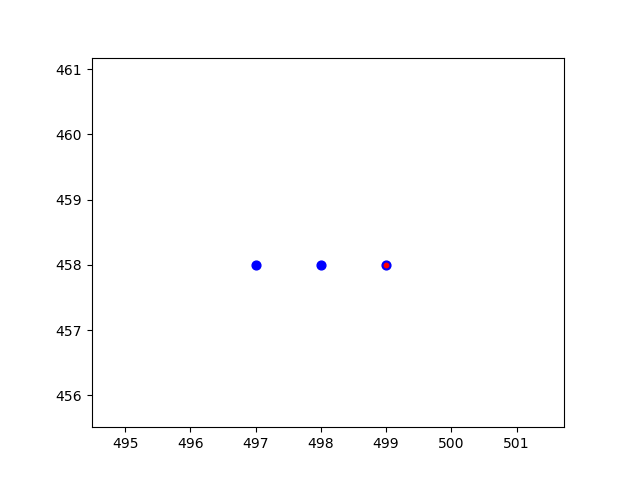

In [56]:
i=706
a=np.loadtxt('/work/yufengs/David/Sim/Au_Sim1_{0:05d}.bin0'.format(i),delimiter=',')
plt.scatter(2048-a[:,0],2048-a[:,1],c='b',s=40)
tmpidx=((-90+i*0.25<=Peaks)*(Peaks<-89.75+i*0.25))[:,2]
tmpPeaks=Peaks[tmpidx]
for ii in range(len(tmpPeaks)):
    plt.scatter(2048-tmpPeaks[ii][0],2048-tmpPeaks[ii][1],c='r',s=10)
plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()

In [13]:
I=plt.imread('/mnt/Mar17/rollett_mar17/nf/Ti7_S0/Ti7_S0_027089.tif')

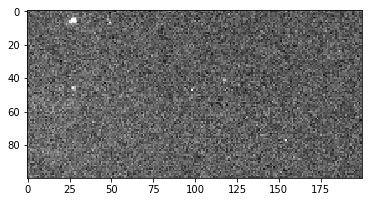

In [18]:
Index=(I>50).astype('int')
It=I*(1-Index)+50*Index
plt.imshow(It[1200:1300,1500:1700],cmap='gray')
plt.show()